## Regression - Excercise 02


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltv
import seaborn as sns
import tensorflow as tf

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

### Load the data

In [85]:
from sklearn.datasets import load_boston

In [86]:
data_set = load_boston()

### Explore the data

In [87]:
X = data_set.data
y = data_set.target

In [88]:
print(type(data_set))
print(data_set.keys())
print(data_set.feature_names)
print(data_set.data.shape)
# print('target : \n' + str(data_set.target))

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


In [89]:
df_X = pd.DataFrame(X, columns=data_set.feature_names)

In [90]:
df_y = pd.DataFrame(y, columns=['PRICE'])

In [91]:
df = pd.concat([df_X, df_y])   # note [] is needed

In [92]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.6
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.9
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0


### Train test and scale data

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [94]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


#### Max Min scaling

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


### Model # 1

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [97]:
model = Sequential()

model.add(Input(shape=(13,))) 
model.add(Dense(13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Train the model

history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=200, verbose=0)

<AxesSubplot:>

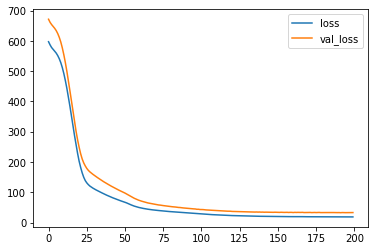

In [99]:
# Plot the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Evaluation

##### Predictions and Errors

In [100]:
y_prediction = model.predict(X_test).flatten()

In [101]:
mean_price = df['PRICE'].mean()
median_price = df['PRICE'].median()

In [102]:
mae = mean_absolute_error(y_test, y_prediction)
mse = np.sqrt(mean_squared_error(y_test, y_prediction))
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_prediction)

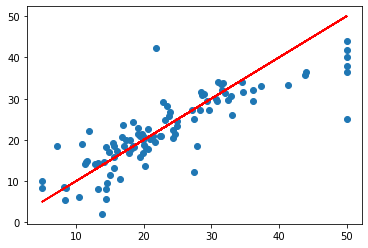

In [103]:
plt.scatter(y_test,y_prediction)
plt.plot(y_test,y_test,'r')

##### Metrics

In [104]:
print(score)
print(mean_price)
print(median_price)
print(mae)
print(mse)
print(rmse)
print(evs)

19.50772476196289
22.532806324110673
21.2
4.019200467128379
5.787013354330336
2.4056211992602528
0.7110295020277859


### Model # 2

In [105]:
model = Sequential()

model.add(Input(shape=(13,))) 
model.add(Dense(13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd',loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=200, verbose=0)

<AxesSubplot:>

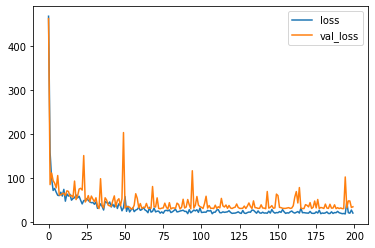

In [107]:
# Plot the loss
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Evaluation

In [108]:
score = model.evaluate(X_test, y_test, batch_size=32)
print(score)

4/4 [==============================] - 0s 2ms/step - loss: 34.2038
34.2038459777832


##### Predictions and Errors

In [109]:
y_prediction = model.predict(X_test).flatten()

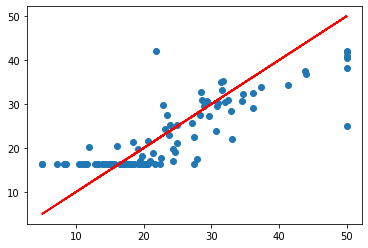

In [110]:
plt.scatter(y_test,y_prediction)
plt.plot(y_test,y_test,'r')

In [111]:
mean_price = df['PRICE'].mean()
median_price = df['PRICE'].median()

In [112]:
mae = mean_absolute_error(y_test, y_prediction)
mse = np.sqrt(mean_squared_error(y_test, y_prediction))
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_prediction)

##### Metrics

In [113]:
print(score)
print(mean_price)
print(median_price)
print(mae)
print(mse)
print(rmse)
print(evs)

34.2038459777832
22.532806324110673
21.2
4.333073702045516
5.848405267283249
2.418347631603705
0.7022004538383231


In [114]:
print(score)
print(mean_price)
print(median_price)
print(mae)
print(mse)
print(vs)

34.2038459777832
22.532806324110673
21.2
4.333073702045516
5.848405267283249
0.8265799767182397


### Model # 3

In [115]:
model = Sequential()

model.add(Input(shape=(13,))) 
model.add(Dense(13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [116]:
# learning rate scheduler
def custom_schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 
custom_scheduler = tf.keras.callbacks.LearningRateScheduler(custom_schedule)

In [117]:
# Train the model

history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=200, verbose=0,
          callbacks=[custom_scheduler])

<AxesSubplot:>

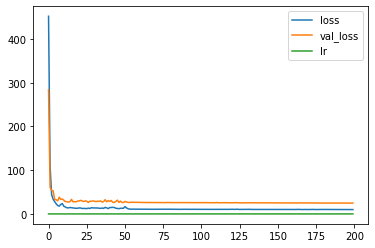

In [118]:
# Plot the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

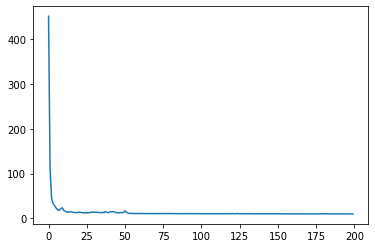

In [119]:
# Plot only the loss
plt.plot(history.history['loss'], label='loss')

#### Evaluation

In [120]:
score = model.evaluate(X_test, y_test, batch_size = 32)

4/4 [==============================] - 0s 997us/step - loss: 24.7436


##### Predictions and Errors

In [121]:
y_prediction = model.predict(X_test).flatten()

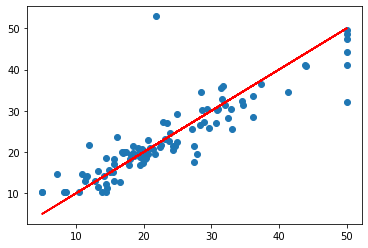

In [122]:
# Our predictions
plt.scatter(y_test,y_prediction)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [123]:
mean_price = df['PRICE'].mean()
median_price = df['PRICE'].median()

In [124]:
mae = mean_absolute_error(y_test, y_prediction)
mse = np.sqrt(mean_squared_error(y_test, y_prediction))
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_prediction)

##### Metrics

In [125]:
print(score)
print(mean_price)
print(median_price)
print(mae)
print(mse)
print(rmse)
print(evs)

24.743627548217773
22.532806324110673
21.2
3.1334950110491584
4.974296570510363
2.230313110419782
0.7798176077507549


### Model # 4

In [126]:
model = Sequential()

model.add(Input(shape=(13,))) 
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_22 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 7         
Total params: 455
Trainable params: 455
Non-trainable params: 0
_________________________________________________________________


In [127]:
# learning rate scheduler
def custom_schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 
custom_scheduler = tf.keras.callbacks.LearningRateScheduler(custom_schedule)

In [128]:
# Train the model

history = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=32,epochs=200, verbose=0,
          callbacks=[custom_scheduler])

<AxesSubplot:>

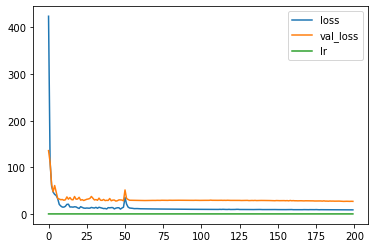

In [129]:
# Plot the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

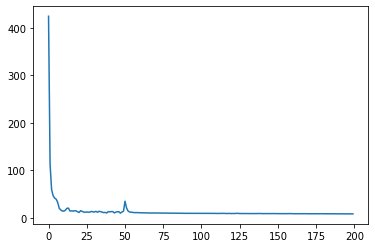

In [130]:
# Plot only the loss
plt.plot(history.history['loss'], label='loss')

#### Evaluation

In [131]:
score = model.evaluate(X_test, y_test, batch_size = 32)

4/4 [==============================] - 0s 997us/step - loss: 26.9422


##### Predictions and Errors

In [132]:
y_prediction = model.predict(X_test).flatten()

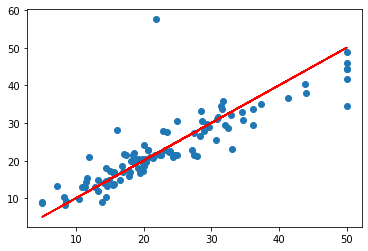

In [133]:
# Our predictions
plt.scatter(y_test,y_prediction)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [134]:
mean_price = df['PRICE'].mean()
median_price = df['PRICE'].median()

In [135]:
mae = mean_absolute_error(y_test, y_prediction)
mse = np.sqrt(mean_squared_error(y_test, y_prediction))
rmse = np.sqrt(mse)
evs = explained_variance_score(y_test, y_prediction)

##### Metrics

In [136]:
print(score)
print(mean_price)
print(median_price)
print(mae)
print(mse)
print(rmse)
print(evs)

26.942184448242188
22.532806324110673
21.2
3.1402611171498025
5.190586116059819
2.2782857845449986
0.7599622549737126
